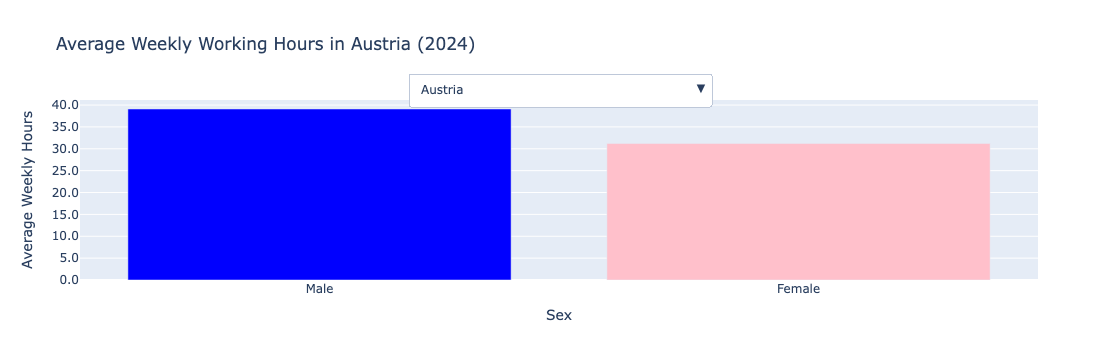

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Load and filter
df = pd.read_csv("workhour_total.csv")
df_2024 = df[
    (df['TIME_PERIOD'] == 2024) &
    (df['sex'].isin(['Males', 'Females'])) &
    (df['OBS_VALUE'].notna())
].copy()

df_2024['sex'] = df_2024['sex'].replace({'Males': 'Male', 'Females': 'Female'})
df_2024 = df_2024[['geo', 'sex', 'OBS_VALUE']]
df_2024.columns = ['country', 'sex', 'average_hours']

# Reshape and keep countries with both sexes
pivot = df_2024.pivot(index='country', columns='sex', values='average_hours').dropna().reset_index()
df_clean = pivot.melt(id_vars='country', value_vars=['Male', 'Female'],
                      var_name='sex', value_name='average_hours')

# Get list of EU countries, place EU27_2020 last
eu_countries = df_clean[df_clean['country'] != 'EU27_2020']['country'].unique().tolist()
eu_countries.sort()
eu_countries.append('EU27_2020')

# Plot
fig = go.Figure()
for i, country in enumerate(eu_countries):
    data = df_clean[df_clean['country'] == country]
    
    colors = {'Male': 'blue', 'Female': 'pink'}
    fig.add_trace(go.Bar(
    x=data['sex'],
    y=data['average_hours'],
    name=country,
    marker_color=[colors[sex] for sex in data['sex']],
    visible=(i == 0)
))


buttons = [
    dict(label=country,
         method='update',
         args=[
             {'visible': [j == i for j in range(len(eu_countries))]},
             {'title': f'Average Weekly Working Hours in {country} (2024)'}
         ])
    for i, country in enumerate(eu_countries)
]

fig.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top'
    }],
    title=f'Average Weekly Working Hours in {eu_countries[0]} (2024)',
    xaxis_title='Sex',
    yaxis_title='Average Weekly Hours',
    yaxis=dict(tickformat=".1f", dtick=5)
)

fig.show()
